# Credit card fraud detection

# importing libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore")

# loading dataset

In [2]:
data=pd.read_csv('C:/Users/MEGHANA/creditcard.csv')
df=data.copy()
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

# Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
#distribution of legit and fraudulent transaction
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

We have 2 classes ,fraudulent transactions are only 492 and 99% are in one class. so we cannot train a machinelearning model with this data. This dataset is highly unbalanced.
We have 2 labels . 0 ----> normal transaction and 1 ----> fraudulent transaction.

In [6]:
#seperating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [7]:
#statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
df.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30 columns]

undersampling

build a sample dataset containing similar distribution of normal transaction and fraudulent transactions.
the no.of fraud transaction is 492

In [10]:
#takes random 492 legit transactions data
legit_sample = legit.sample(n=492)

concatenating 2 dataframes

In [11]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)

In [12]:
new_dataset.head()

Time        V1        V2        V3        V4        V5        V6  \
228786  145663.0  2.129386 -0.047018 -1.493742  0.157002  0.445250 -0.517159   
10952    18816.0  1.249041  0.269497  0.625343  0.838916 -0.497799 -0.964129   
47611    43278.0 -0.401546  0.994562  2.060391  2.412679  0.011492  0.156716   
206531  136244.0  2.004099 -0.121092 -1.014131  0.314706 -0.111714 -0.856667   
112292   72598.0 -0.365316  0.750502  1.062237  0.405442 -0.030072 -0.565215   

              V7        V8        V9  ...       V21       V22       V23  \
228786  0.181330 -0.270912  0.534278  ... -0.346964 -0.826038  0.211984   
10952  -0.087239 -0.232610  1.476457  ... -0.415030 -1.014745  0.153042   
47611   0.365519  0.235370 -1.101186  ... -0.095320 -0.246763  0.053452   
206531  0.057000 -0.157285  0.301709  ... -0.228094 -0.562277  0.346911   
112292  1.080217 -0.085157 -1.081214  ... -0.177817 -0.746056  0.225299   

             V24       V25       V26       V27       V28  Amount  Class  
228786 -1.049202 -0.155846  0.264451 -0.065409 -0.070184    0.89      0  
10952   0.287491  0.159409  0.058750 -0.063501  0.011729    8.98      0  
47611   0.504470 -0.644347 -0.214943  0.158852  0.162415    7.80      0  
206531  0.013023 -0.360954  0.178954 -0.072476 -0.070173    1.98      0  
112292  0.308560 -0.553317  0.191834  0.046843  0.130709   84.95      0  

[5 rows x 31 columns]

In [13]:
new_dataset.tail()

Time        V1        V2        V3        V4        V5        V6  \
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  ...       V21       V22       V23  \
279863 -0.882850  0.697211 -2.064945  ...  0.778584 -0.319189  0.639419   
280143 -1.413170  0.248525 -1.127396  ...  0.370612  0.028234 -0.145640   
280149 -2.234739  1.210158 -0.652250  ...  0.751826  0.834108  0.190944   
281144 -2.208002  1.058733 -1.632333  ...  0.583276 -0.269209 -0.456108   
281674  0.223050 -0.068384  0.577829  ... -0.164350 -0.295135 -0.072173   

             V24       V25       V26       V27       V28  Amount  Class  
279863 -0.294885  0.537503  0.788395  0.292680  0.147968  390.00      1  
280143 -0.081049  0.521875  0.739467  0.389152  0.186637    0.76      1  
280149  0.032070 -0.739695  0.471111  0.385107  0.194361   77.89      1  
281144 -0.183659 -0.328168  0.606116  0.884876 -0.253700  245.00      1  
281674 -0.450261  0.313267 -0.289617  0.002988 -0.015309   42.53      1  

[5 rows x 31 columns]

In [14]:
new_dataset.shape

(984, 31)

In [15]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [16]:
new_dataset.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      95485.745935 -0.054444  0.158381  0.059622 -0.016395  0.032875   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.139015  0.021574 -0.085180 -0.037328  ... -0.062848  0.080422   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0      0.008195  0.002319 -0.010712 -0.025460  0.002127 -0.021103  0.024110   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       72.943476  
1      122.211321  

[2 rows x 30 columns]

splitting the data into features and targets

In [17]:
x=new_dataset.drop(columns='Class',axis=1)
y=new_dataset['Class']

In [18]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
228786  145663.0  2.129386 -0.047018 -1.493742  0.157002  0.445250 -0.517159   
10952    18816.0  1.249041  0.269497  0.625343  0.838916 -0.497799 -0.964129   
47611    43278.0 -0.401546  0.994562  2.060391  2.412679  0.011492  0.156716   
206531  136244.0  2.004099 -0.121092 -1.014131  0.314706 -0.111714 -0.856667   
112292   72598.0 -0.365316  0.750502  1.062237  0.405442 -0.030072 -0.565215   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [20]:
print(y)

228786    0
10952     0
47611     0
206531    0
112292    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


splitting the data into training data and testing data

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [24]:
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

Logistic Regression

In [25]:
model=LogisticRegression()

In [27]:
model.fit(x_train,y_train)

LogisticRegression()

Model Evaluation

Accuracy score

In [29]:
x_train_pred=model.predict(x_train)
training_data_accu=accuracy_score(x_train_pred,y_train)

In [30]:
print("accuracy on training data : ",training_data_accu)

accuracy on training data :  0.9237611181702668


In [33]:
x_test_pred=model.predict(x_test)
testing_data_accu=accuracy_score(x_test_pred,y_test)

In [34]:
print("accuracy on testing data : ",testing_data_accu)

accuracy on testing data :  0.9035532994923858


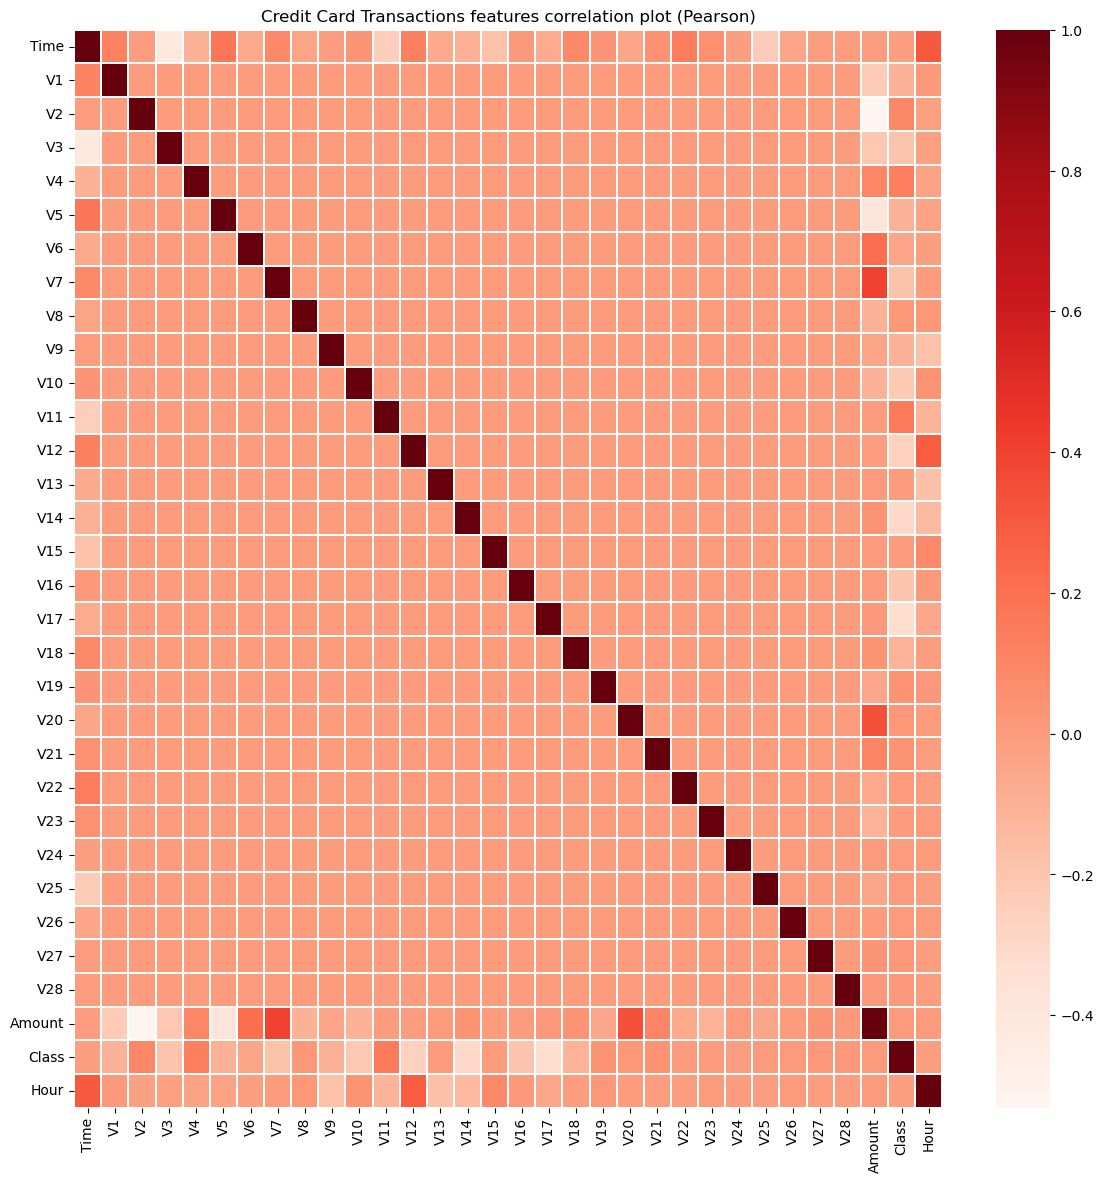